In [3]:
import networkx as nx
import queue

def find_augmentpath(N, s, t):
  P = [-1] * nx.number_of_nodes(N)
  visited = set()
  stack = queue.LifoQueue()
  stack.put(s)
  while not stack.empty():
    v = stack.get()
    if v == t:
      return P, True
    if not v in visited:
      visited.add(v)
      for w in N.neighbors(v):
        if not w in visited and N.edges[v, w]['weight'] > 0:
          stack.put(w)
          P[w] = v
  return P, False

def restore_shortestpath(u, v, P):
  path = []
  temp = v
  while temp != u:
    parent = P[temp]
    path.append((parent, temp))
    temp = parent
  path.reverse()
  return path


def min_capacity(N, path):
  min_cap = float('inf')
  for u, v in path:
    capacity = N.edges[u, v]['weight']
    if capacity < min_cap:
      min_cap = capacity
  return min_cap

def increase_flow(N, path, amount, flow):
  for u, v in path:
    if flow[(v, u)] <= 0:
      flow[(u, v)] += amount
    else:
      diff = flow[(v, u)] - amount
      if diff >= 0:
        flow[(v, u)] = diff
      else:
        flow[(u, v)] = -diff
        flow[(v, u)] = 0
    N.edges[u, v]['weight'] -= amount
    if N.has_edge(v, u):
      N.edges[v, u]['weight'] += amount
    else:
      N.add_edge(v, u, weight=amount)


def my_Ford_Fulkerson(G, s, t):
  N = G.copy()
  f = {}
  for u, v in N.edges:
    f[(u, v)] = 0
    f[(v, u)] = 0
  P, is_found = find_augmentpath(N, s, t)
  while is_found:
    augmentpath = restore_shortestpath(s, t, P)
    min_cap = min_capacity(N, augmentpath)
    increase_flow(N, augmentpath, min_cap, f)
    P, is_found = find_augmentpath(N, s, t)
  return N, f


G = nx.read_weighted_edgelist('test.edgelist', create_using=nx.DiGraph(), nodetype=int)
N, f = my_Ford_Fulkerson(G, 0, 5)
print(f)

{(0, 1): 20.0, (1, 0): 0, (0, 2): 0, (2, 0): 0, (0, 3): 0, (3, 0): 0, (0, 4): 20.0, (4, 0): 0, (0, 5): 10.0, (5, 0): 0, (1, 3): 0, (3, 1): 0, (1, 6): 0, (6, 1): 0, (1, 7): 20.0, (7, 1): 0, (2, 9): 0, (9, 2): 0, (2, 10): 0, (10, 2): 0, (2, 11): 0, (11, 2): 0, (3, 8): 0, (8, 3): 0, (3, 12): 0, (12, 3): 0, (4, 5): 40.0, (5, 4): 0, (4, 12): 0, (12, 4): 0, (6, 2): 0, (2, 6): 0, (6, 13): 0, (13, 6): 0, (7, 4): 20.0, (4, 7): 0, (7, 13): 0, (13, 7): 0, (9, 13): 0, (13, 9): 0, (10, 13): 0, (13, 10): 0, (11, 13): 0, (13, 11): 0, (8, 10): 0, (10, 8): 0, (8, 13): 0, (13, 8): 0, (12, 13): 0, (13, 12): 0}


In [4]:
f

{(0, 1): 20.0,
 (1, 0): 0,
 (0, 2): 0,
 (2, 0): 0,
 (0, 3): 0,
 (3, 0): 0,
 (0, 4): 20.0,
 (4, 0): 0,
 (0, 5): 10.0,
 (5, 0): 0,
 (1, 3): 0,
 (3, 1): 0,
 (1, 6): 0,
 (6, 1): 0,
 (1, 7): 20.0,
 (7, 1): 0,
 (2, 9): 0,
 (9, 2): 0,
 (2, 10): 0,
 (10, 2): 0,
 (2, 11): 0,
 (11, 2): 0,
 (3, 8): 0,
 (8, 3): 0,
 (3, 12): 0,
 (12, 3): 0,
 (4, 5): 40.0,
 (5, 4): 0,
 (4, 12): 0,
 (12, 4): 0,
 (6, 2): 0,
 (2, 6): 0,
 (6, 13): 0,
 (13, 6): 0,
 (7, 4): 20.0,
 (4, 7): 0,
 (7, 13): 0,
 (13, 7): 0,
 (9, 13): 0,
 (13, 9): 0,
 (10, 13): 0,
 (13, 10): 0,
 (11, 13): 0,
 (13, 11): 0,
 (8, 10): 0,
 (10, 8): 0,
 (8, 13): 0,
 (13, 8): 0,
 (12, 13): 0,
 (13, 12): 0}

In [5]:
def my_dfs(G, s):
    visited = set()
    stack = queue.LifoQueue()

    stack.put(s)

    while not stack.empty():
        v = stack.get()
        if not v in visited:
            visited.add(v)
            print(v)
            for w in G.neighbors(v):
                if not w in visited and G.edges[v, w]['weight'] != 0:
                    stack.put(w)
    return visited
my_dfs(N, 0)

0
3
12
13
8
10
2
11
9


{0, 2, 3, 8, 9, 10, 11, 12, 13}

In [6]:
def min_cut(G, s, t):
    N = G.copy()
    f = {}
    for u,v in N.edges:
        f[(u,v)] = 0
        f[(v,u)] = 0
    P, is_found = find_augmentpath(N,s,t)
    while is_found:
        augmentpath = restore_shortestpath(s,t,P)
        min_cap = min_capacity(N, augmentpath)
        increase_flow(N, augmentpath, min_cap, f)
        P, is_found = find_augmentpath(N,s,t)
    A = my_dfs(N, 0)

    return A
min_cut(G, 0, 13)

0
5
4
12
2
11
10
9


{0, 2, 4, 5, 9, 10, 11, 12}

In [7]:
def mincut_dfs(G, source):
  visited = set()
  stack = queue.LifoQueue()
  stack.put(source)
  while not stack.empty():
    v = stack.get()
    if not v in visited:
      visited.add(v)
    for w in G.neighbors(v):
        if not w in visited and G.edges[v, w]['weight'] > 0:
          stack.put(w)
  return visited, set(G.nodes)-visited


N,f = my_Ford_Fulkerson(G,0,13)
mincut_dfs(N,0)

({0, 2, 4, 5, 9, 10, 11, 12}, {1, 3, 6, 7, 8, 13})

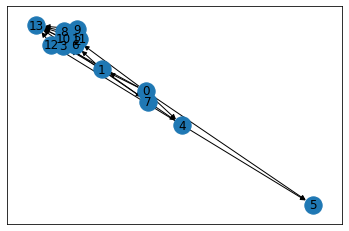

In [8]:
nx.draw_networkx(G)

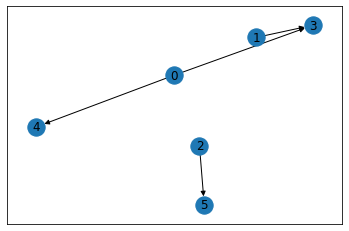

In [9]:
G = nx.read_weighted_edgelist('psp_final.edgelist', create_using=nx.DiGraph(), nodetype=int)
nx.draw_networkx(G)

In [10]:
def project_network(G, profit):
    n = G.number_of_nodes()
    Gp = G.copy()
    cap = sum([i for i in profit if i>0]) + 1
    for e in Gp.edges():
        Gp.edges[e]['weight'] = cap
    for v in range(len(profit)):
        p = profit[v]
        if profit[v] > 0:
            Gp.add_edge(n,v,weight=p)
        else:
            Gp.add_edge(v,n+1,weight=-p)
    return Gp

In [14]:
G = nx.read_weighted_edgelist('psp_final.edgelist', create_using=nx.DiGraph(), nodetype=int)
Gp = project_network(G, [15, 30, 10, -15, -20, -5])
print(Gp.edges(data=True))
print(G.nodes())

[0, 3, 4, 1, 2, 5]


In [12]:
def residual_network(G, f):
  N = G.copy()
  for (u, v), amount in f.items():
    N.edges[u,v]['weight'] -= amount
    if not G.has_edge(v, u):
      N.add_edge(v, u, weight=0)
    N.edges[v,u]['weight'] += amount
  return N

In [13]:
G = nx.read_weighted_edgelist('maxflow.edgelist', create_using=nx.DiGraph(), nodetype=int)
f = {(0, 1) : 5, (1, 2): 5, (2, 3) : 5}
N = residual_network(G, f)
N.edges(data=True)

OutEdgeDataView([(0, 1, {'weight': 15.0}), (0, 2, {'weight': 10.0}), (1, 2, {'weight': 25.0}), (1, 3, {'weight': 10.0}), (1, 0, {'weight': 5}), (2, 3, {'weight': 15.0}), (2, 1, {'weight': 5}), (3, 2, {'weight': 5})])